In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts'))

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

In [3]:
from data_fetcher import fetch_data

In [4]:
tsla_data = fetch_data("TSLA", "2015-01-01", "2025-01-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
tsla_data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...
2025-01-24,406.579987,418.880005,405.779999,414.450012,56427100
2025-01-27,397.149994,406.690002,389.000000,394.799988,58125500


In [6]:
# Remove the 'Ticker' 
tsla_data.columns = tsla_data.columns.droplevel('Ticker')

# Rename the 'Price' level 
tsla_data.columns.name = None

In [7]:
# Reset the index, making 'Date' a regular column
tsla_data = tsla_data.reset_index()

In [8]:
tsla_data

,Date,Close,High,Low,Open,Volume
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2530,2025-01-24,406.579987,418.880005,405.779999,414.450012,56427100
2531,2025-01-27,397.149994,406.690002,389.000000,394.799988,58125500
2532,2025-01-28,398.089996,400.589996,386.500000,396.910004,48910700
2533,2025-01-29,389.100006,398.589996,384.480011,395.209991,68033600


In [9]:
bnd_data = fetch_data("BND", "2015-01-01", "2025-01-31")

[*********************100%***********************]  1 of 1 completed


In [10]:
bnd_data

Price,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND
Date,,,,,
2015-01-02,62.573139,62.603423,62.399007,62.406579,2218800
2015-01-05,62.754845,62.777556,62.610997,62.641281,5820100
2015-01-06,62.936478,63.125749,62.860770,62.860770,3887600
2015-01-07,62.974361,63.050069,62.875942,62.944077,2433400
2015-01-08,62.875965,62.921388,62.815397,62.921388,1873400
...,...,...,...,...,...
2025-01-24,71.805977,71.855810,71.636531,71.766106,5555700
2025-01-27,72.184738,72.204677,72.025262,72.104996,8621200


In [11]:
# Remove the 'Ticker' 
bnd_data.columns = bnd_data.columns.droplevel('Ticker')

# Rename the 'Price' level 
bnd_data.columns.name = None

In [12]:
bnd_data

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,62.573139,62.603423,62.399007,62.406579,2218800
2015-01-05,62.754845,62.777556,62.610997,62.641281,5820100
2015-01-06,62.936478,63.125749,62.860770,62.860770,3887600
2015-01-07,62.974361,63.050069,62.875942,62.944077,2433400
2015-01-08,62.875965,62.921388,62.815397,62.921388,1873400
...,...,...,...,...,...
2025-01-24,71.805977,71.855810,71.636531,71.766106,5555700
2025-01-27,72.184738,72.204677,72.025262,72.104996,8621200
2025-01-28,72.144867,72.154837,71.975421,72.154837,4424300


In [13]:
# Reset the index, making 'Date' a regular column
bnd_data = bnd_data.reset_index()

In [14]:
spy_data = fetch_data("SPY", "2015-01-01", "2025-01-31")

[*********************100%***********************]  1 of 1 completed


In [15]:
spy_data

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2015-01-02,172.592896,173.811130,171.542703,173.391052,121465900
2015-01-05,169.475876,171.702279,169.165023,171.534251,169632600
2015-01-06,167.879608,170.316050,167.073055,169.786749,209151400
2015-01-07,169.971573,170.316039,168.770159,169.223836,125346700
2015-01-08,172.987717,173.206165,171.383032,171.399826,147217800
...,...,...,...,...,...
2025-01-24,607.969971,610.780029,606.799988,609.809998,34604700
2025-01-27,599.369995,599.690002,594.640015,594.809998,70361100


In [16]:
# Remove the 'Ticker' 
spy_data.columns = spy_data.columns.droplevel('Ticker')

# Rename the 'Price' level 
spy_data.columns.name = None

In [17]:
# Reset the index, making 'Date' a regular column
spy_data = spy_data.reset_index()

In [18]:
spy_data

,Date,Close,High,Low,Open,Volume
0,2015-01-02,172.592896,173.811130,171.542703,173.391052,121465900
1,2015-01-05,169.475876,171.702279,169.165023,171.534251,169632600
2,2015-01-06,167.879608,170.316050,167.073055,169.786749,209151400
3,2015-01-07,169.971573,170.316039,168.770159,169.223836,125346700
4,2015-01-08,172.987717,173.206165,171.383032,171.399826,147217800
...,...,...,...,...,...,...
2530,2025-01-24,607.969971,610.780029,606.799988,609.809998,34604700
2531,2025-01-27,599.369995,599.690002,594.640015,594.809998,70361100
2532,2025-01-28,604.520020,605.369995,597.250000,600.619995,44433300
2533,2025-01-29,601.809998,604.130005,599.219971,603.719971,37177400


In [19]:
# check for missing values
print("TSLA Missing Values:\n", tsla_data.isnull().sum())
print("BND Missing Values:\n", bnd_data.isnull().sum())
print("SPY Missing Values:\n", spy_data.isnull().sum())

TSLA Missing Values:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
BND Missing Values:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
SPY Missing Values:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [20]:
# check for info
print("TSLA data_info :\n", tsla_data.info())
print("BND data_info:\n", bnd_data.info())
print("SPY data_info:\n", spy_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2535 non-null   datetime64[ns]
 1   Close   2535 non-null   float64       
 2   High    2535 non-null   float64       
 3   Low     2535 non-null   float64       
 4   Open    2535 non-null   float64       
 5   Volume  2535 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 119.0 KB
TSLA data_info :
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2535 non-null   datetime64[ns]
 1   Close   2535 non-null   float64       
 2   High    2535 non-null   float64       
 3   Low     2535 non-null   float64       
 4   Open    2535 non-null   float64       
 5   Volume  2535 non-null   int64

In [21]:
# check for info
print("TSLA data_discribe :\n", tsla_data.describe())
print("BND data_discribe:\n", bnd_data.describe())
print("SPY data_discribe:\n", spy_data.describe())

TSLA data_discribe :
                                 Date        Close         High          Low  \
count                           2535  2535.000000  2535.000000  2535.000000   
mean   2020-01-14 14:32:31.242603776   117.848209   120.474827   115.097514   
min              2015-01-02 00:00:00     9.578000    10.331333     9.403333   
25%              2017-07-10 12:00:00    17.228000    17.527667    16.942000   
50%              2020-01-15 00:00:00    30.298000    32.329334    29.760000   
75%              2022-07-21 12:00:00   221.525002   226.696671   217.061661   
max              2025-01-30 00:00:00   479.859985   488.540009   457.510010   
std                              NaN   116.508288   119.236025   113.698930   

              Open        Volume  
count  2535.000000  2.535000e+03  
mean    117.877662  1.120308e+08  
min       9.488000  1.062000e+07  
25%      17.259334  6.680295e+07  
50%      31.299999  9.264180e+07  
75%     222.653336  1.294283e+08  
max     475.899994  9

# Exploratory Data Analysis

## visualize closing price

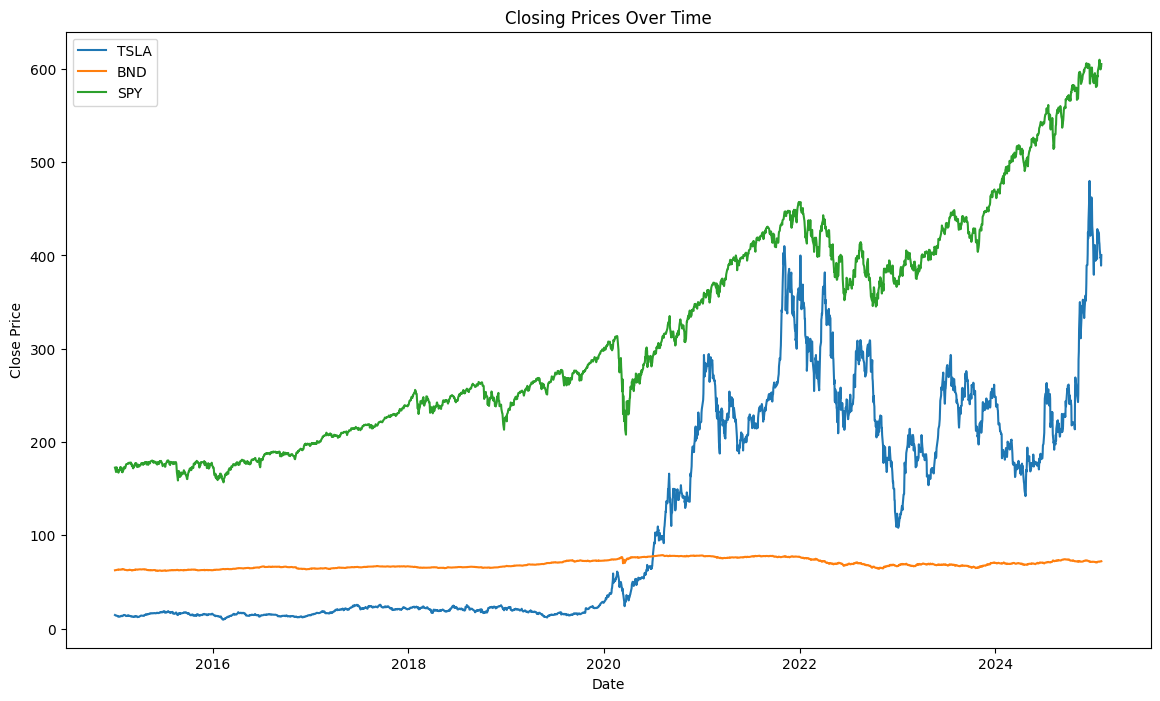

In [22]:
# Plot closing prices
plt.figure(figsize=(14, 8))
plt.plot(tsla_data['Date'], tsla_data['Close'], label='TSLA')
plt.plot(bnd_data['Date'], bnd_data['Close'], label='BND')
plt.plot(spy_data['Date'], spy_data['Close'], label='SPY')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

## daily percentage change

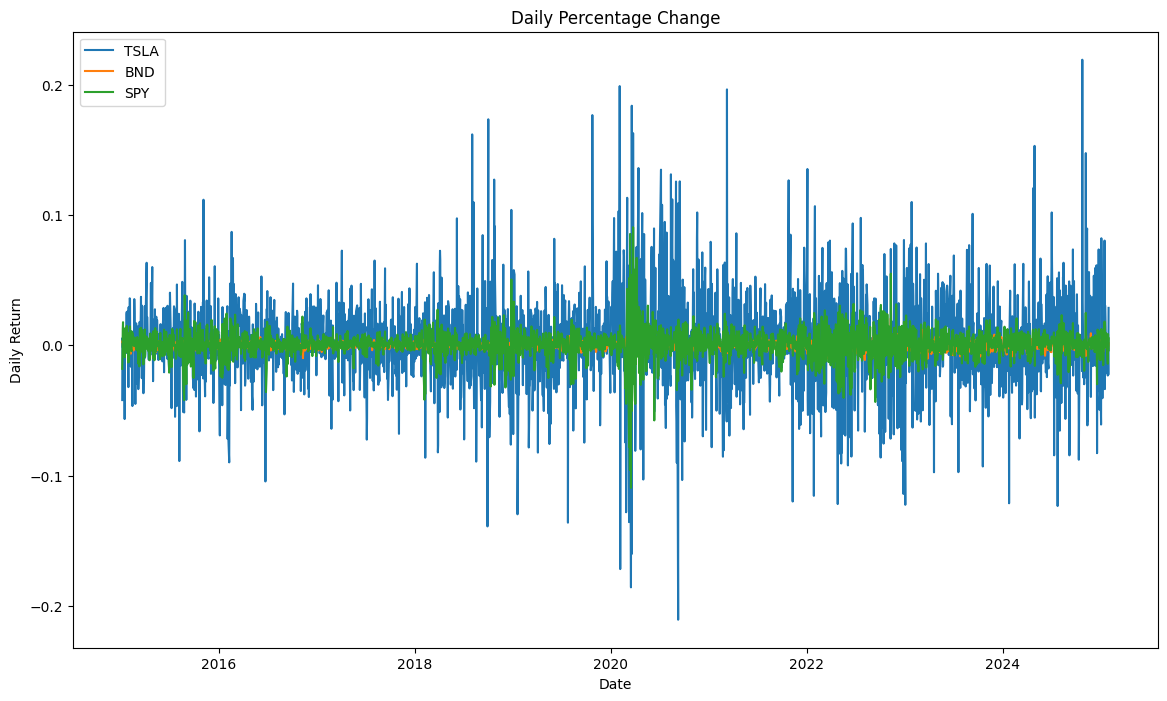

In [23]:
# Calculate daily percentage change
tsla_data['Daily Return'] = tsla_data['Close'].pct_change()
bnd_data['Daily Return'] = bnd_data['Close'].pct_change()
spy_data['Daily Return'] = spy_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 8))
plt.plot(tsla_data['Date'], tsla_data['Daily Return'], label='TSLA')
plt.plot(bnd_data['Date'], bnd_data['Daily Return'], label='BND')
plt.plot(spy_data['Date'], spy_data['Daily Return'], label='SPY')
plt.title("Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

## analyze volatility

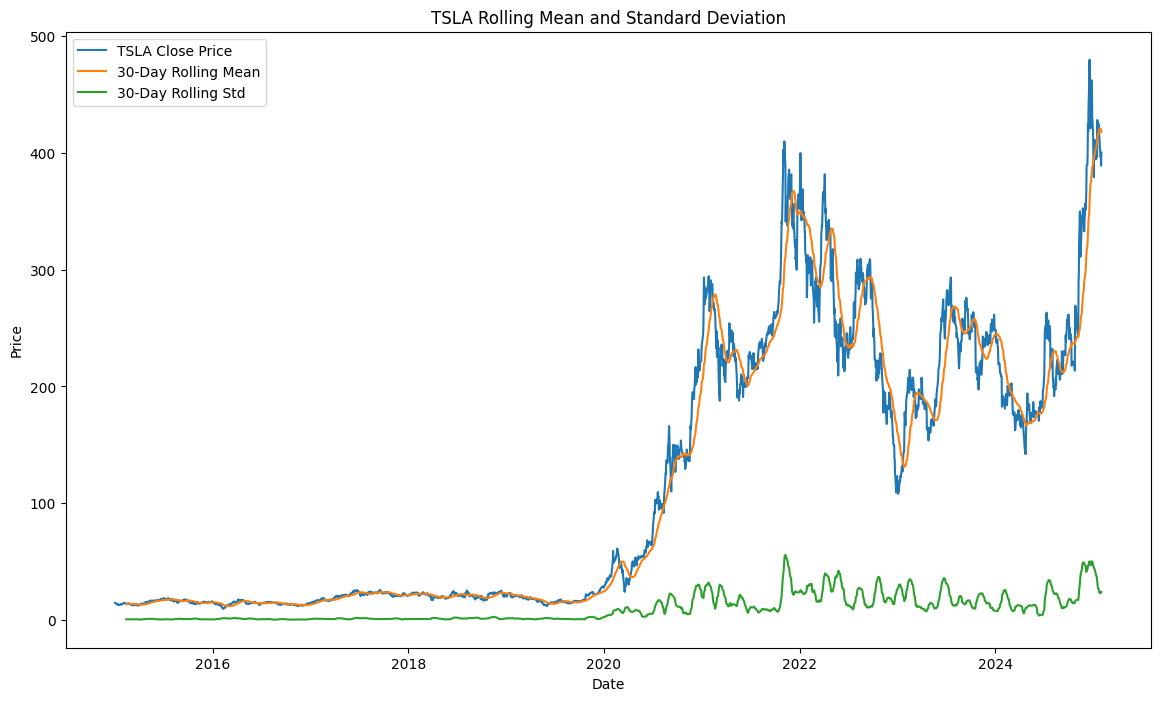

In [24]:
# Calculate rolling mean and standard deviation
tsla_data['Rolling Mean'] = tsla_data['Close'].rolling(window=30).mean()
tsla_data['Rolling Std'] = tsla_data['Close'].rolling(window=30).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(14, 8))
plt.plot(tsla_data['Date'], tsla_data['Close'], label='TSLA Close Price')
plt.plot(tsla_data['Date'], tsla_data['Rolling Mean'], label='30-Day Rolling Mean')
plt.plot(tsla_data['Date'], tsla_data['Rolling Std'], label='30-Day Rolling Std')
plt.title("TSLA Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

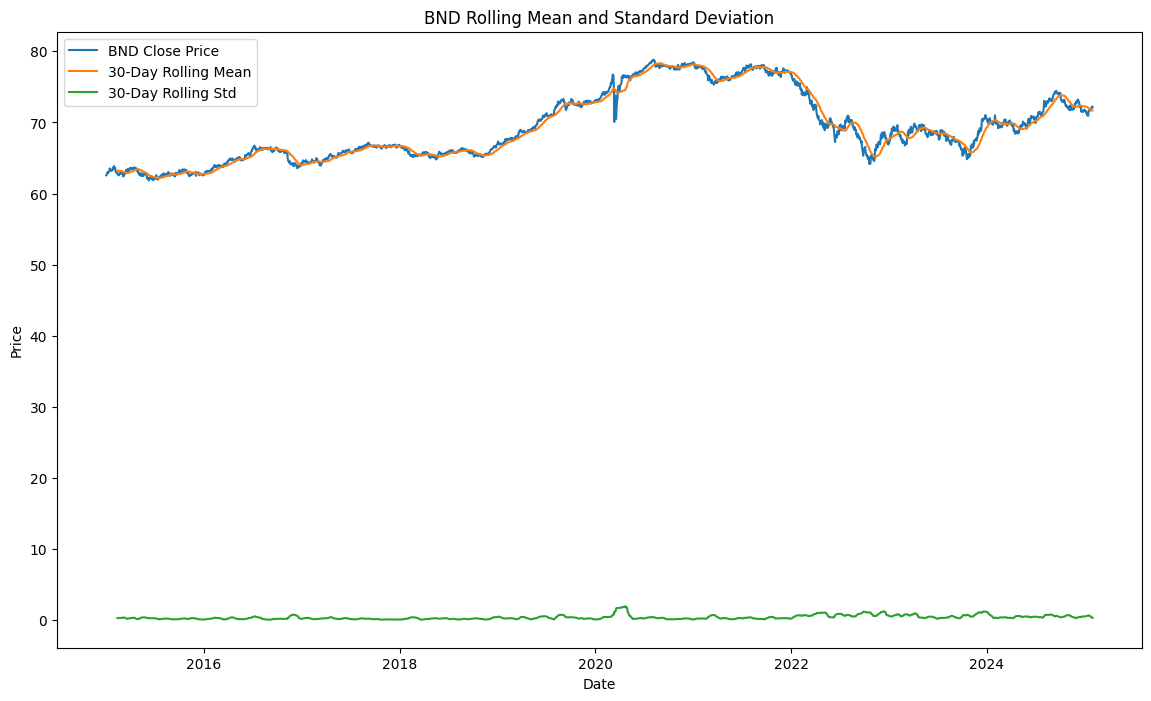

In [25]:
# Calculate rolling mean and standard deviation
bnd_data['Rolling Mean'] = bnd_data['Close'].rolling(window=30).mean()
bnd_data['Rolling Std'] = bnd_data['Close'].rolling(window=30).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(14, 8))
plt.plot(bnd_data['Date'], bnd_data['Close'], label='BND Close Price')
plt.plot(bnd_data['Date'], bnd_data['Rolling Mean'], label='30-Day Rolling Mean')
plt.plot(bnd_data['Date'], bnd_data['Rolling Std'], label='30-Day Rolling Std')
plt.title("BND Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

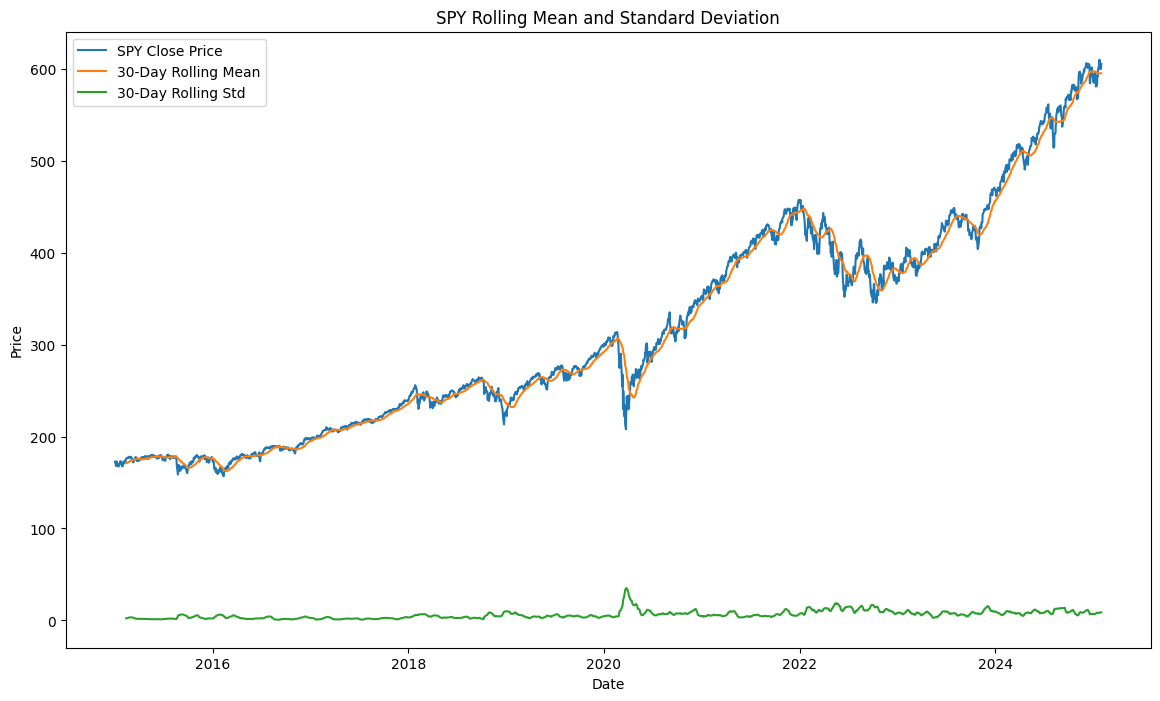

In [26]:
# Calculate rolling mean and standard deviation
spy_data['Rolling Mean'] = spy_data['Close'].rolling(window=30).mean()
spy_data['Rolling Std'] = spy_data['Close'].rolling(window=30).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(14, 8))
plt.plot(spy_data['Date'], spy_data['Close'], label='SPY Close Price')
plt.plot(spy_data['Date'], spy_data['Rolling Mean'], label='30-Day Rolling Mean')
plt.plot(spy_data['Date'], spy_data['Rolling Std'], label='30-Day Rolling Std')
plt.title("SPY Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

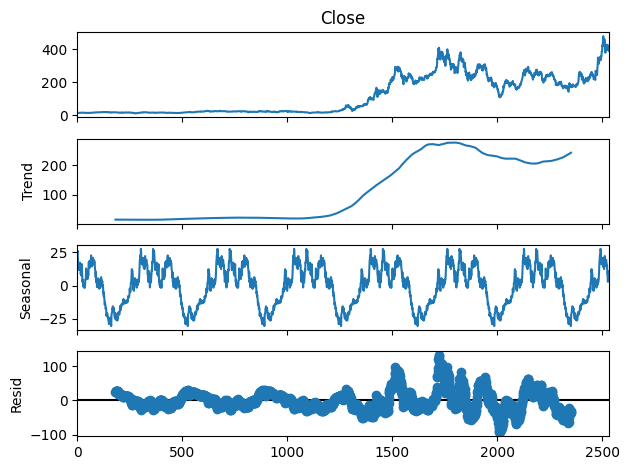

In [27]:
# Decompose TSLA time series
tsla_decomposition = seasonal_decompose(tsla_data['Close'], period=365, model='additive')
tsla_decomposition.plot()
plt.show()

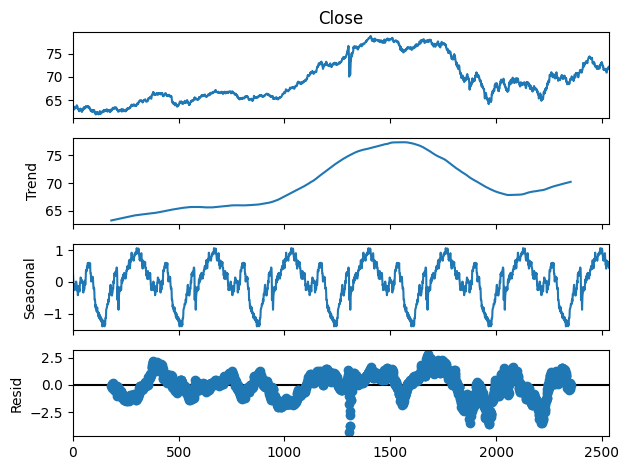

In [28]:
# Decompose BND time series
bnd_decomposition = seasonal_decompose(bnd_data['Close'], period=365, model='additive')
bnd_decomposition.plot()
plt.show()

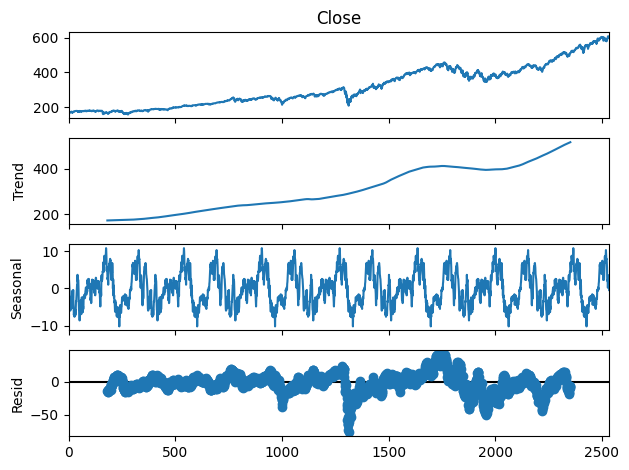

In [29]:
# Decompose SPY time series
spy_decomposition = seasonal_decompose(spy_data['Close'], period=365, model='additive')
spy_decomposition.plot()
plt.show()

# VaR and Sharpe Ratio

In [30]:
# Calculate VaR (95% confidence level)
var_tsla = tsla_data['Daily Return'].quantile(0.05)

# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_tsla = tsla_data['Daily Return'].mean() / tsla_data['Daily Return'].std()

print(f"TSLA VaR (95%): {var_tsla}")
print(f"TSLA Sharpe Ratio: {sharpe_tsla}")

TSLA VaR (95%): -0.051387250644693294
TSLA Sharpe Ratio: 0.054218392045088555


In [31]:
# Calculate VaR (95% confidence level)
var_bnd = bnd_data['Daily Return'].quantile(0.05)

# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_bnd = bnd_data['Daily Return'].mean() / bnd_data['Daily Return'].std()

print(f"BND VaR (95%): {var_bnd}")
print(f"BND Sharpe Ratio: {sharpe_bnd}")

BND VaR (95%): -0.00480129814325973
BND Sharpe Ratio: 0.01820426840918742


In [32]:
# Calculate VaR (95% confidence level)
var_spy = spy_data['Daily Return'].quantile(0.05)

# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_spy = spy_data['Daily Return'].mean() / spy_data['Daily Return'].std()

print(f"SPY VaR (95%): {var_spy}")
print(f"SPY Sharpe Ratio: {sharpe_spy}")

SPY VaR (95%): -0.01671913245405089
SPY Sharpe Ratio: 0.050238947334774166
